Hazm is an NLP library for Persian language; it's very helpfull for Persian text preprocessing and tokenizing. In this project we'll use it for text preprocessing but first we should install it.

In [1]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 504.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 sha256=bc4b81004daae6fce1db3844d82bc9350708d2582217e932f99fffba1e3799d3
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=192760 sha256=e08a7e260d59ad049da2fb42346b088417c9f0347344b112e154571bbc786dfd
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstallin

# Data Loading

"Query Paraphrasing" is the task of detecting whether two given questions are paraphrases of each other or not. Here, we will use "parsinlu query paraphrasing" dataset, which is available in Huggingface library datasets. First we are going to load and split it to train, test and validation sets.

In [2]:
from datasets import load_dataset

train_data, test_data, validation_data = load_dataset("persiannlp/parsinlu_query_paraphrasing", split=['train', 'test', 'validation'])

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1830 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1916 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/898 [00:00<?, ? examples/s]

Dataset parsinlu_reading_comprehension downloaded and prepared to /root/.cache/huggingface/datasets/persiannlp___parsinlu_reading_comprehension/parsinlu-repo/1.0.0/1e5cb07241759334b5bce975c409d88d69d54e7430b6cafe6ed8e215501e28f4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

For easy using, it's better to convert datasets to Pandas DataFrame.

In [3]:
import pandas as pd

train_df = pd.DataFrame(train_data)
train_df

,q1,q2,category,label
0,چگونه می توانم کم کم وزن خود را کاهش دهم؟,چگونه وزن کم کنم؟,qqp,1
1,چگونه استمناء بر قدرت تمرکز شخص تأثیر می گذارد؟,آیا چرک روی لوزه ها می تواند نشانه ای از STD ب...,qqp,0
2,وقتی خواب کسی را دیدم و گفتم آنها در حال مرگ ه...,وقتی خواب می بینم که کسی در حال مرگ باشد معنی ...,qqp,0
3,چگونه می توانم فایل های apk را تغییر دهم؟,بهترین روش برای ویرایش فایل های APK چیست؟,qqp,1
4,از کجا می توانم کفش های کپی درجه اول را در بمب...,از کجا ، در بنگلور می توانید کفش های درجه اول ...,qqp,0
...,...,...,...,...
1825,من یک توسعه دهنده PHP هستم. من از دردسر و استر...,چگونه می توانم هنگامی که یک توسعه دهنده روی چن...,qqp,0
1826,دانلود اهنگ لیلا فروهر به نام چه دلنواز اومدم ...,دانلود اهنگ لیلا فروهر به نام چه دلنواز اومدم؟,natural,1
1827,بیت المقدس در کدام کشور قرار دارد؟,کوه آرارات در کدام کشور قرار دارد؟,natural,0
1828,داستان معراج پیامبر در کدام سوره است؟,داستان معراج پیامبر در کدام سوره قران است؟,natural,1


Let's get some information about dataset such as columns type and the count of non-Null entries

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   q1        1830 non-null   object
 1   q2        1830 non-null   object
 2   category  1830 non-null   object
 3   label     1830 non-null   object
dtypes: object(4)
memory usage: 57.3+ KB


In [5]:
test_df = pd.DataFrame(test_data)
test_df

,q1,q2,category,label
0,آیا جهان روح وجود دارد؟ اگر بله ، مبتکر و کنتر...,چه چیزی روح فرد را می شکند؟,qqp,0
1,چگونه می توانم تماشای فیلم های پورنو را متوقف ...,برای جلوگیری از تماشای کامل پورنو باید چه کاری...,qqp,1
2,چه کسانی امام علی را خدا میدانند؟,چه کسانی می توانند امام زمان را ببینند؟,natural,0
3,آیا قرار است دونالد ترامپ رئیس جمهور بعدی ایال...,شانس اینکه دونالد ترامپ رئیس جمهور بعدی آمریکا...,qqp,1
4,چگونه می توانم سوالی را در این باره بپرسم؟,چگونه می توانم سوال بپرسم؟,qqp,0
...,...,...,...,...
1911,چه چیزهایی روزه زن را باطل میکند اهل سنت؟,چه چیزهایی روزه زن را باطل میکند مکارم شیرازی؟,natural,0
1912,وای چه پسری وای عجب تاج سری؟,دانلود اهنگ پسر وای وای چه پسری وای عجب تاج سری؟,natural,1
1913,از چه زمانی حرکات جنین کم میشود؟,از چه زمانی حرکات جنین حس میشود؟,natural,0
1914,کدام یک از شرکتها دارای رشد شغلی بهتری دارند؟ ...,۴ لوله ورودی و ۲ لوله خروجی ، ورودی آب را پیدا...,qqp,0


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   q1        1916 non-null   object
 1   q2        1916 non-null   object
 2   category  1916 non-null   object
 3   label     1916 non-null   object
dtypes: object(4)
memory usage: 60.0+ KB


In [7]:
validation_df = pd.DataFrame(validation_data)
validation_df

,q1,q2,category,label
0,چه زمانی باید گوشی را شارژ کنیم؟,چه زمانی باید گوشی را به شارژ زد؟,natural,1
1,با چه چیزی دیوار را تمیز کنیم؟,با چه چیزی گیتار را تمیز کنیم؟,natural,0
2,چه چیزی مردم را از Quora دور می کند؟,"آیا راهی برای خاموش کردن گزینه ""دعوت از مردم ب...",qqp,0
3,کتابهایی که توسط aiims topper ۲۰۱۶ مورد مطالعه...,برای ورود PG من در AIIMS چه کتابهایی باید مطال...,qqp,0
4,کدام کشور ها به ببرهای اقتصادی آسیا لقب گرفته ...,گلزار به کدام کشور ها سفر کرده است؟,natural,0
...,...,...,...,...
893,چرا lorikeet رنگین کمانی می تواند حیوان خانگی ...,آیا lorikeets می تواند حیوانات خانگی خوبی باشد...,qqp,0
894,تو قلب من نشستی قلب منو شکستی؟,قلب من چه عاشقانه از صدای تو کوک شد؟,natural,0
895,چرا دریا طوفانی شده بود صادق چوبک؟,کتاب چرا دریا طوفانی شد؟,natural,1
896,آیا الان بلیط NFL را از StubHub بخرم یا منتظر ...,چگونه می توانید بلیط های شخصی را از طریق فیس ب...,qqp,0


In [8]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   q1        898 non-null    object
 1   q2        898 non-null    object
 2   category  898 non-null    object
 3   label     898 non-null    object
dtypes: object(4)
memory usage: 28.2+ KB


**IMPORTANT NOTE:** As you can see below, the whole data is not well divided; For example, almost only 39.4% of the data is allocated to the train set!

It would have been better to allocate at least a part of the validation data to the train data, but in this project we respect the initial division and do not make any changes in the data splits **BUT** it should be noted that this case will definitely affect the models training and their accuracy :)

In [9]:
data_len = len(train_df) + len(validation_df) + len(test_df)
print('Train Data pct = ', len(train_df)/data_len)
print('Validation Data pct = ', len(validation_df)/data_len)
print('Test Data pct = ', len(test_df)/data_len)

Train Data pct =  0.39405684754521964
Validation Data pct =  0.1933677863910422
Test Data pct =  0.4125753660637382


Before going to the next steps, it is better to check whether the data is unbalanced or not

In [10]:
train_df["label"].value_counts()

0    1136
1     694
Name: label, dtype: int64

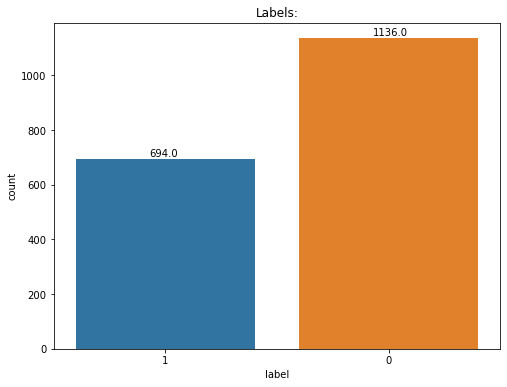

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title("Labels:")
ax = sns.countplot(x=train_df['label'])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+10))

plt.show()

HMMMMM... Our bad luck again! Data is almost unbalanced and we have no choice but oversampling because the nature of the data (text) is such that other solutions cannot be used or at least I don't know!

In [52]:
max_size = train_df['label'].value_counts().max()
over_sampling = []
for class_index, group in train_df.groupby('label'):
    over_sampling.append(group.sample(max_size-len(group), replace=True))

# convert to DataFrame    
over_sampling = pd.concat(over_sampling)
# concatenate over_sampling df to train_df
train_df = pd.concat([train_df, over_sampling], ignore_index=True)
# shuffle the DataFrame rows
train_df = train_df.sample(frac=1, ignore_index=True)
train_df

,q1,q2,category,label,cleaned_texts
0,دانلود اهنگ چه راحت گرفتی این زندگیو؟,دانلود اهنگ چه راحت گرفتی این زندگیمو از مسعود...,natural,1,دانلود اهنگ چه راحت گرفتی این زندگیو؟ دانلود ا...
1,graffittibooks.com چیست؟,sugamsauda.com چیست؟,qqp,0,graffittibooks. com چیست؟ sugamsauda. com چیست؟
2,بهترین گزینه برای مهندس مکانیک بعد از لیسانس م...,بهترین گزینه بعد از کارشناسی در مهندسی مکانیک ...,qqp,1,بهترین گزینه برای مهندس مکانیک بعد از لیسانس م...
3,یکی از بزرگترین تصورات غلطی که مردم نسبت به شم...,به نظر شما بزرگترین تصور غلطی است که مردم نسبت...,qqp,1,یکی از بزرگترین تصورات غلطی که مردم نسبت به شم...
4,ارور در حال حاضر نمیتوانید از فیسبوک استفاده ک...,کدام کشور در حال حاضر پناهنده میگیرد؟,natural,0,ارور در حال حاضر نمیتوانید از فیسبوک استفاده ک...
...,...,...,...,...,...
2267,چگونه می توانم جلوی خودارضایی را بگیرم؟,چگونه جلوی خودارضایی را بگیرم و زنان را فراموش...,qqp,1,چگونه میتوانم جلوی خودارضایی را بگیرم؟ چگونه ج...
2268,چرا دهان زن باردار تلخ می شود؟,چرا مزه دهان تلخ می شود؟,natural,0,چرا دهان زن باردار تلخ میشود؟ چرا مزه دهان تلخ...
2269,چرا هیچ برنامه ای رو گوشی نصب نمی شود؟,چرا هیچ برنامه ای روی گوشی من نصب نمی شود؟,natural,1,چرا هیچ برنامهای رو گوشی نصب نمیشود؟ چرا هیچ ب...
2270,چه غذاهایی برای التهاب روده مفید است؟,چه غذاهایی برای زخم روده مفید است؟,natural,0,چه غذاهایی برای التهاب روده مفید است؟ چه غذاها...


Let's check the count of each label for last time

In [13]:
train_df["label"].value_counts()

1    1136
0    1136
Name: label, dtype: int64

# Data Preprocessing

Here, I am going to define a function that takes text and do some text preprocessing on it using Hazm and re libraries; These are:

1. Strip: remove characters (Here, just whitespaces) from the beginning and end of a string.

2. Hazm Normalizer: this module do some corrections on persian texts such as remove extra spaces, convert english numbers to persian numbers format, remove diacritics, persian affixes spacing, punctuation spacing, etc.

3. compile some special unicodes with the help of re.compile method.

In [14]:
import hazm
import re

def text_preprocessing(txt):
    txt = txt.strip()
    normalizer = hazm.Normalizer()
    txt = normalizer.normalize(txt)
    extra_characters = re.compile("["
    u"\u200c"
    u"\u200d"
    u"\u2640-\u2642"
    u"\u2600-\u2B55"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\u3030"
    u"\ufe0f"
    u"\u2069"
    u"\u2066"
    u"\u2068"
    u"\u2067"
    "]+", flags=re.UNICODE)

    txt = extra_characters.sub(r'', txt)
    
    return txt

Now we apply this function on concatenation of 'q1' and 'q2' columns of each train, test and validation dataframes. After that, we add these results in the form of a new column named 'cleaned_texts' to the train, test and validation dataframes separately.

**NOTE:** In fact, after this, 'cleaned_texts' column will be the most important part of the data; So that the tokenizer and encoding of BERT model will be applied to this column.

In [15]:
train_df['cleaned_texts'] = (train_df['q1'] + train_df['q2']).apply(text_preprocessing)
test_df['cleaned_texts'] = (test_df['q1'] + test_df['q2']).apply(text_preprocessing)
validation_df['cleaned_texts'] = (validation_df['q1'] + validation_df['q2']).apply(text_preprocessing)

Let's compare q1, q2 and cleaned version of those just for example

In [53]:
print('q1: ' , train_df['q1'][74])
print('q2: ' , train_df['q2'][74])
print('cleaned texts (q1 + q2): ' , train_df['cleaned_texts'][74])

q1:  چرا کسی در اینجا به سوالات من پاسخ نمی دهد؟
q2:  چرا هیچ کس سؤالهایم را جواب نمی دهد؟
cleaned texts (q1 + q2):  چرا کسی در اینجا به سوالات من پاسخ نمیدهد؟ چرا هیچ کس سؤالهایم را جواب نمیدهد؟


Finally, let's convert type of 'label' values to int32 here, so we can use it as the target for our models in the next sections.

In [17]:
import numpy as np

y_train = np.array(train_df['label'], dtype=np.int32)
y_validation = np.array(validation_df['label'], dtype=np.int32)
y_test = np.array(test_df['label'], dtype=np.int32)

# Pretrained-BERT based classification models

In this project, we want to build and compare the results of two classification language models based on two separate pretrained BERT models named "ParsBERT" and "M-BERT". Both are available using Huggingface transformers.

**STEP 1:**

First, I am going to create a class named "BERT_Model" which has several methods: 
*  __init__: Like any Python class, the __init__ method is the constructor which used to initializing the object’s state. Every object of this class has model_name, train_data, validation_data and test_data; So these are the init method arguments.


* **bert_tokenizer**: It's a method that returns the tokenizer of the pretrained Bert model 

* **bert_config**: It's a method that returns the configuration of the pretrained Bert model

* **tf_bert_model**: It's a method that returns a TensorFlow pretrained Bert model

* **max_sequence_length**: In ML models, after tokenizing the texts(data, sentences), we need padding so that all the data have the same length; This is required for the model to design and work properly. So, we usually choose the longest length of the sequence as the padding size.
    This method collects all the data and tokenizes each one. After that, with the help of the "tokenizer.encode_plus" function it adds BERT special tokens such as [CLS], [SEP], [EOS] and returns the list of token IDs for each text(data). Here, we calculate the length of each list and return the longest one as the output of the method.
    
* **bert_tokenizer_encode**: This method is very similar to the previous method which means it collects all the data and tokenizes each one. Again, with the help of the "tokenizer.encode_plus" function it adds BERT special tokens and for padding size, we can either give a number to the corresponding argument or we can calculate the max length of the sequence with the help of the previous method.

    This method returns "input_ids" (List of token ids to be fed to a model) and "attention_mask" (List of indices specifying which tokens should be attended to by the model) for each train, validation and test sets.

In [18]:
from transformers import BertTokenizer, TFBertModel, BertConfig

class BERT_Model():
    
    def __init__(self, model_name, train_data, validation_data, test_data):
        self.model_name = model_name
        self.train_data = train_data
        self.validation_data = validation_data
        self.test_data = test_data
        
        
    def bert_tokenizer(self):
        return BertTokenizer.from_pretrained(self.model_name)
    
    
    def bert_config(self):
        return BertConfig.from_pretrained(self.model_name)
    
    
    def tf_bert_model(self):
        return TFBertModel.from_pretrained(self.model_name)
    
    
    def max_sequence_length(self):
        tokenizer = self.bert_tokenizer()
        data = list(self.train_data) + list(self.validation_data) + list(self.test_data)
        input_ids_len = []
        
        for text in data:
            encoded = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                return_attention_mask=False)

            input_ids_len.append(len(encoded['input_ids']))

        return max(input_ids_len)
    
    
    def bert_tokenizer_encode(self, max_seq_len=None):
        tokenizer = self.bert_tokenizer()
        data = list(self.train_data) + list(self.validation_data) + list(self.test_data)
        input_ids = []
        attention_masks = []
        
        if max_seq_len == None:
            msl = self.max_sequence_length()
        else:
            msl = max_seq_len
            
        for text in data:
            encoded = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=msl,
                padding='max_length',
                return_attention_mask=True,
                return_tensors='tf')

            input_ids.append(encoded['input_ids'])
            attention_masks.append(encoded['attention_mask'])
        
        train_input_ids, train_attention_masks = input_ids[0:len(self.train_data)], attention_masks[0:len(self.train_data)]
        validation_input_ids, validation_attention_masks = input_ids[len(self.train_data):len(self.train_data)+len(self.validation_data)], attention_masks[len(self.train_data):len(self.train_data)+len(self.validation_data)]
        test_input_ids, test_attention_masks = input_ids[-len(self.test_data):], attention_masks[-len(self.test_data):]

        return np.array(train_input_ids), np.array(train_attention_masks), np.array(validation_input_ids), np.array(validation_attention_masks), np.array(test_input_ids), np.array(test_attention_masks)

2023-02-03 20:29:12.331975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 20:29:12.333054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 20:29:12.333766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-03 20:29:12.336345: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

**STEP 2:**

Now it's time to design the classification model; We have two inputs which are "input_ids" and "attention_masks" with the same shapes. Since each input data is a TensorFlow tf.constant object (a tensor), we should flatten them and after that we can use them as inputs of pretrained BERT model. Then, we take BERT model output and pass them to a fully connected network for classification.

Since we want to use pretrained-BERT models, we must not train it again; So we set trainability of first 5 layers to False. However, the input and flatten layers have no trainable parameters and the goal is to freeze the pretrained BERT outputs during training process.

**NOTE:** Considering that in this project, the learning rate(= 3e-5) and the number of epochs(= 4) have fixed, predetermined and small values, a large number of neurons(= 1024) have been selected for Dense layers; Of course, this can lead to overfitting, but we tried to prevent it by adding L2 regularizers to layers.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization

def build_model(input_shape, bert_model):
    #Input layers
    input_ids = Input(shape=(input_shape[1], input_shape[2]), dtype='int64')
    input_attention_masks = Input(shape=(input_shape[1], input_shape[2]), dtype='int64')
    #Flatten layers
    ids_fltn = Flatten()(input_ids)
    mask_fltn = Flatten()(input_attention_masks)
    #BERT Layer
    bert = bert_model([ids_fltn, mask_fltn])[1]
    #Fully connected network
    ffn = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003))(bert)
    ffn = Dropout(0.2)(ffn)
    ffn = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(ffn)
    ffn = Dropout(0.2)(ffn)
    output = Dense(1,activation='sigmoid')(ffn)
    
    #build and compile the model
    model = Model(inputs=[input_ids, input_attention_masks], outputs=output)
    model.compile(Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    #Freeze first 5 layers to prevent pretrained BERT model from re-training
    for layer in model.layers[:5]:
        layer.trainable = False

    model.summary()
    return model

# ParsBERT-based model

First, we create ParsBERT object using the model name and splits of data. As we mentioned before, the 'cleaned_texts' column is given as inputs to class for feeding BERT tokenizer and rest of steps.

In [20]:
model_name = 'HooshvareLab/bert-fa-zwnj-base'
ParsBERT = BERT_Model(model_name, train_df['cleaned_texts'], validation_df['cleaned_texts'], test_df['cleaned_texts'])

Let's check the config of pretrained ParsBERT model to get some information about it:

In [21]:
config = ParsBERT.bert_config()
print(config.to_json_string())

Downloading:   0%|          | 0.00/565 [00:00<?, ?B/s]

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 42000
}



Let's know what is the max len of sequence according to ParsBERT tokenizer:

In [22]:
max_seq_len = ParsBERT.max_sequence_length()
print("Max sequence length of ParsBERT tokenizer= ", max_seq_len)

Downloading:   0%|          | 0.00/416k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/292 [00:00<?, ?B/s]

Max sequence length of ParsBERT tokenizer=  117


Now we can prepare the necessary inputs for training the classification model. First, we start by taking "input IDs' and 'attention masks' of train, validation and test sets:

In [23]:
P_train_input_ids, P_train_attention_masks, P_validation_input_ids, P_validation_attention_masks, P_test_input_ids, P_test_attention_masks = ParsBERT.bert_tokenizer_encode()

Second, we should get the pretrained ParsBERT model itself:

In [24]:
ParsBERT_model = ParsBERT.tf_bert_model()

Downloading:   0%|          | 0.00/575M [00:00<?, ?B/s]

Some layers from the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Finally, we can build and fit the ParsBERT-based classification model; As we mentioned before, in this project, the number of epochs(= 4) and batch size(= 8) are fixed and predetermined values.

In [25]:
ParsBERT_based_model = build_model(P_train_input_ids.shape, ParsBERT_model)
ParsBERT_history = ParsBERT_based_model.fit([P_train_input_ids, P_train_attention_masks],
                                            y_train,
                                            validation_data=([P_validation_input_ids, P_validation_attention_masks], y_validation),
                                            batch_size=8,
                                            epochs=4
                                            )

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 117)]     0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1, 117)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 117)          0           input_1[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 117)          0           input_2[0][0]                    
______________________________________________________________________________________________

2023-02-03 20:30:56.898898: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


284/284 [==============================] - 56s 163ms/step - loss: 4.0931 - accuracy: 0.6739 - val_loss: 4.0435 - val_accuracy: 0.7027
Epoch 2/4
284/284 [==============================] - 44s 154ms/step - loss: 3.6005 - accuracy: 0.8605 - val_loss: 3.7304 - val_accuracy: 0.7550
Epoch 3/4
284/284 [==============================] - 44s 154ms/step - loss: 3.1824 - accuracy: 0.9287 - val_loss: 3.6476 - val_accuracy: 0.7027
Epoch 4/4
284/284 [==============================] - 44s 154ms/step - loss: 2.8675 - accuracy: 0.9577 - val_loss: 3.4096 - val_accuracy: 0.7561


# M_BERT-based model

First, we create M-BERT object using the model name and splits of data. As we mentioned before, the 'cleaned_texts' column is given as inputs to class for feeding BERT tokenizer and rest of steps.

In [26]:
model_name = 'bert-base-multilingual-cased'
M_BERT = BERT_Model(model_name, train_df['cleaned_texts'], validation_df['cleaned_texts'], test_df['cleaned_texts'])

Let's check the config of pretrained M-BERT model to get some information about it:

In [27]:
config = M_BERT.bert_config()
print(config.to_json_string())

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}



Let's know what is the max len of sequence according to M-BERT tokenizer:

In [28]:
max_seq_len = M_BERT.max_sequence_length()
print("Max sequence length of M-BERT tokenizer= ", max_seq_len)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Max sequence length of M-BERT tokenizer=  165


Now we can prepare the necessary inputs for training the classification model. First, we start by taking "input IDs' and 'attention masks' of train, validation and test sets:

In [29]:
M_train_input_ids, M_train_attention_masks, M_validation_input_ids, M_validation_attention_masks, M_test_input_ids, M_test_attention_masks = M_BERT.bert_tokenizer_encode()

Second, we should get the pretrained M-BERT model itself:

In [30]:
M_BERT_model = M_BERT.tf_bert_model()

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Finally, we can build and fit the M_BERT-based classification model; As we mentioned before, in this project, the number of epochs(= 4) and batch size(= 8) are fixed and predetermined values.

In [31]:
M_BERT_based_model = build_model(M_train_input_ids.shape, M_BERT_model)
M_BERT_history = M_BERT_based_model.fit([M_train_input_ids, M_train_attention_masks],
                                        y_train,
                                        validation_data=([M_validation_input_ids, M_validation_attention_masks], y_validation),
                                        batch_size=8,
                                        epochs=4
                                        )

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1, 165)]     0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1, 165)]     0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 165)          0           input_3[0][0]                    
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 165)          0           input_4[0][0]                    
____________________________________________________________________________________________

# Evaluating the models

For visualizing the results of training process, we define a function which gets history of model for plotting the accuracy and loss of train and validation data during training process.

In [32]:
def plot_training_results(model_history):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

    ax[0].plot(model_history.history['accuracy'])
    ax[0].plot(model_history.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_ylabel('accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'val'], loc='upper left')

    ax[1].plot(model_history.history['loss'])
    ax[1].plot(model_history.history['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_ylabel('val_loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'val'], loc='upper right')

    fig.show()

Let's to plot ParsBERT-based model history:

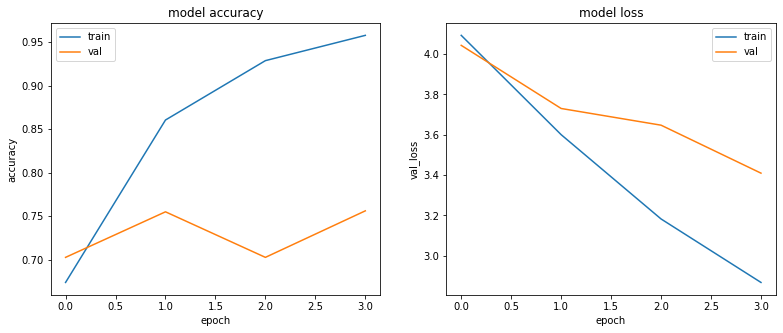

In [33]:
plot_training_results(ParsBERT_history)

Let's to plot M_BERT-based model history:

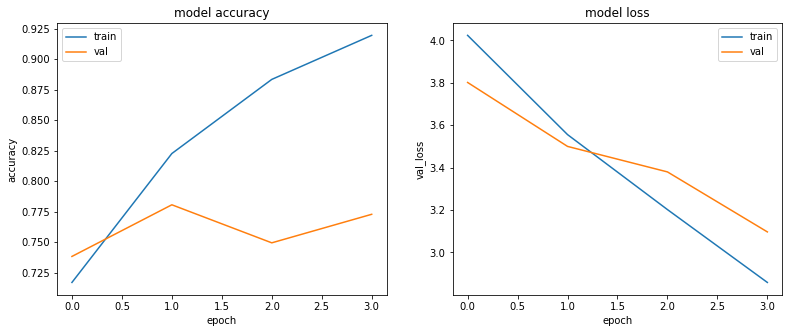

In [34]:
plot_training_results(M_BERT_history)

Finally, for evaluating the models we use sklearn classification report and confusion matrix. First, we should predict classes of test data; Then, by comparing the actual values and the predicted values, we can measure the performance of the model

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

def Prediction_results(model, test_input_ids, test_attention_masks, y_test):
    y_pred = np.round(model.predict([test_input_ids, test_attention_masks]))
    fig, ax = plt.subplots(figsize=(8,8))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)

    return print(classification_report(y_test, y_pred))

Let's check the results of ParsBERT-based model:

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1082
           1       0.71      0.62      0.66       834

    accuracy                           0.73      1916
   macro avg       0.72      0.71      0.72      1916
weighted avg       0.72      0.73      0.72      1916



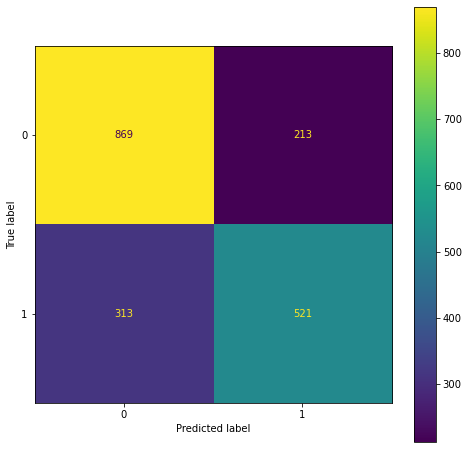

In [36]:
Prediction_results(ParsBERT_based_model, P_test_input_ids, P_test_attention_masks, y_test)

Let's check the results of M_BERT-based model:

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1082
           1       0.77      0.65      0.70       834

    accuracy                           0.76      1916
   macro avg       0.76      0.75      0.75      1916
weighted avg       0.76      0.76      0.76      1916



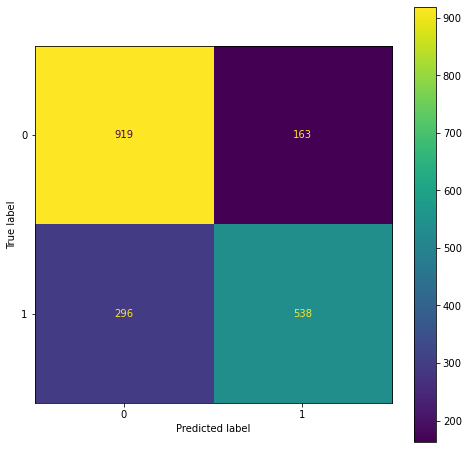

In [37]:
Prediction_results(M_BERT_based_model, M_test_input_ids, M_test_attention_masks, y_test)

# Conclusion

The performance of M_BERT-based model is better than ParsBERT-based model. In my opinion, such a result was almost predictable at least for the following reasons:

1. **Number of model parameters(weights):**

    M_BERT-based model = 177,853,440 
    
    ParsBERT-based model = 118,297,344
    
    **NOTE:** These numbers are related to Non-trainable wiegths of models that belongs to pretrained BERT outputs. It is good to remember for fair judgment, both classification models have the same number of trainable parameters equal to 1,838,081
    
2. **vocab size of pretrained BERT models:**

    M-BERT = 119547
    
    ParsBERT = 42000